/home/andrew/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Parameter containing:
tensor([0.1000, 1.0000, 1.0000], requires_grad=True)


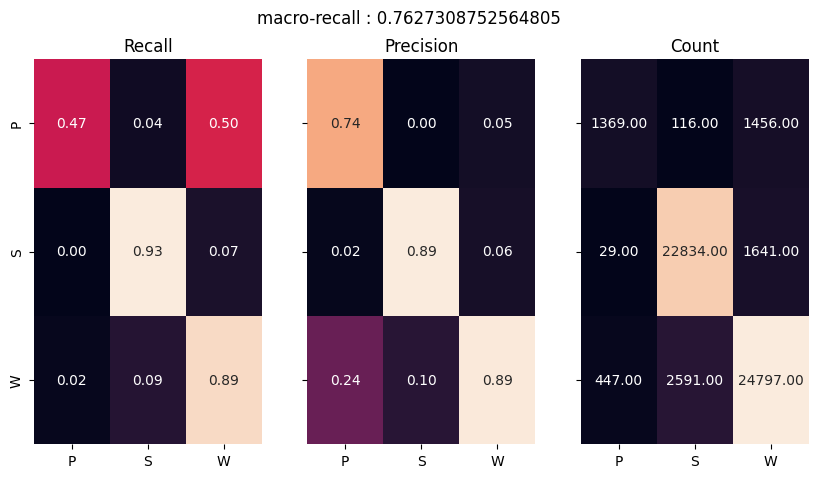

In [1]:
import torch
from lib.utils import load_raw_list,cms
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from lib.models import CNN_0
from torch.nn.functional import relu,one_hot,softmax
from lib.datasets import EEGDataset

model = CNN_0().cuda()
model.load_state_dict(torch.load(f='model_pt_epoch_1000.pt'))
test = EEGDataset(dir='pt/test',labels='pt/y_test.pt')
test_dataloader = DataLoader(test, batch_size=32, shuffle=False)

y_true = [test[i][1].argmax(axis=0).item() for i in range(len(test))]
y_pred = torch.Tensor().cuda()
for (X,_) in test_dataloader:
    y_pred = torch.cat([y_pred,softmax(model(X.cuda()),dim=1).argmax(axis=1)])
y_pred = y_pred.cpu()
cms(y_true=y_true,y_pred=y_pred)